In [1082]:
%matplotlib inline
import os, sys
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from pandas_datareader import data
from wallstreet import Stock, Call, Put

In [1090]:
stock.head()

,Open,High,Low,Close,Volume
Date,,,,,


In [1086]:
stock=data.DataReader("AAPL",start="2017-07-28",end='2017-12-15',data_source='google')

C:\users\lucasfermo\anaconda3\lib\site-packages\pandas_datareader\data.py:139: ResourceWarning: unclosed <socket.socket fd=4220, family=AddressFamily.AF_INET6, type=SocketKind.SOCK_STREAM, proto=0, laddr=('2607:fea8:a79f:f4b7:415b:59f6:2e0e:7cf1', 65088, 0, 0), raddr=('2607:f8b0:4009:80e::2004', 80, 0, 0)>
  session=session).read()


In [993]:
aapl=Options('aapl','yahoo')

In [994]:
aapl=aapl.get_all_data()

In [1006]:
myStrike.head()

Last   Bid   Ask   Chg     PctChg  \
Expiry     Type Symbol                                                   
2017-07-28 call AAPL170728C00150000  3.32  3.25  3.40 -0.24  -6.741574   
           put  AAPL170728P00150000  0.03  0.02  0.03 -0.03 -50.000000   
2017-08-04 call AAPL170804C00150000  5.00  4.95  5.10  0.34   7.296141   
           put  AAPL170804P00150000  1.55  1.55  1.58  0.03   1.973682   
2017-08-11 call AAPL170811C00150000  5.10  5.05  5.25 -0.31  -5.730129   

                                        Vol  Open_Int        IV  Root  \
Expiry     Type Symbol                                                  
2017-07-28 call AAPL170728C00150000  2810.0   15618.0  0.207039  AAPL   
           put  AAPL170728P00150000  3556.0   13271.0  0.167977  AAPL   
2017-08-04 call AAPL170804C00150000  2616.0    9654.0  0.333259  AAPL   
           put  AAPL170804P00150000   617.0    8944.0  0.310310  AAPL   
2017-08-11 call AAPL170811C00150000    62.0    2748.0  0.262947  AAPL   

                                     IsNonstandard Underlying  \
Expiry     Type Symbol                                          
2017-07-28 call AAPL170728C00150000          False       AAPL   
           put  AAPL170728P00150000          False       AAPL   
2017-08-04 call AAPL170804C00150000          False       AAPL   
           put  AAPL170804P00150000          False       AAPL   
2017-08-11 call AAPL170811C00150000          False       AAPL   

                                     Underlying_Price          Quote_Time  \
Expiry     Type Symbol                                                      
2017-07-28 call AAPL170728C00150000            153.32 2017-07-27 15:30:27   
           put  AAPL170728P00150000            153.32 2017-07-27 15:30:27   
2017-08-04 call AAPL170804C00150000            153.32 2017-07-27 15:30:27   
           put  AAPL170804P00150000            153.32 2017-07-27 15:30:27   
2017-08-11 call AAPL170811C00150000            153.32 2017-07-27 15:30:27   

                                        Last_Trade_Date  \
Expiry     Type Symbol                                    
2017-07-28 call AAPL170728C00150000 2017-07-27 15:10:27   
           put  AAPL170728P00150000 2017-07-27 15:13:17   
2017-08-04 call AAPL170804C00150000 2017-07-26 19:59:46   
           put  AAPL170804P00150000 2017-07-27 15:12:27   
2017-08-11 call AAPL170811C00150000 2017-07-27 15:03:58   

                                                                                  JSON  
Expiry     Type Symbol                                                                  
2017-07-28 call AAPL170728C00150000  {'contractSymbol': 'AAPL170728C00150000', 'str...  
           put  AAPL170728P00150000  {'contractSymbol': 'AAPL170728P00150000', 'str...  
2017-08-04 call AAPL170804C00150000  {'contractSymbol': 'AAPL170804C00150000', 'str...  
           put  AAPL170804P00150000  {'contractSymbol': 'AAPL170804P00150000', 'str...  
2017-08-11 call AAPL170811C00150000  {'contractSymbol': 'AAPL170811C00150000', 'str...

In [1083]:
#Get 150 strike data from 2017 calls only
myStrike=aapl.loc[150.0]
myStrike=myStrike[::2]

expiry=myStrike.index.levels[0]
myStrike=myStrike[expiry<"2018"]
expiry=expiry[expiry<'2018']

last=myStrike['Last'].values
df=pd.DataFrame(last,index=expiry,columns=['Price'])


,Price
Expiry,
2017-07-28,3.32
2017-08-04,5.00
2017-08-11,5.10
2017-08-18,5.42
2017-08-25,6.10
2017-09-01,6.35
2017-09-15,6.75
2017-10-20,8.35
2017-11-17,9.70


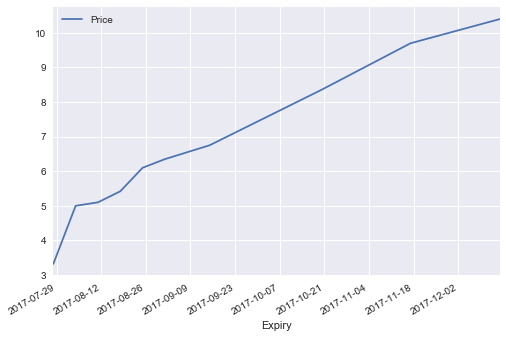

In [1098]:
df.plot(style="-")